<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Aprendizagem Automática (AA)</h3>
<h3>1º Trabalho Laboratorial – Pima Indians Diabetes Dataset </h3>
<br>


15 de Outubro 2024
</center>


***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>

- [Introdução](#section1)
- [Desenvolvimento](#section2)
  - [Separação dos dados em treino, validação e teste](#subsection2)
  - [Visualização dos Dados](#subsection21)
  - [Classificadores Binários](#subsection22)
  - [Logistic Regression](#subsection23)
    - [Obtenção dos melhores parâmetros - Logistic Regression](#subsection231)
    - [Teste de Validação - Logistic Regression](#subsection232)
    - [Teste - Logistic Regression](#subsection233)
    - [Curva ROC - Logistic Regression](#subsection234)
        
  - [Random Forest Classifier](#subsection24)
    - [Obtenção dos melhores parâmetros - Random Forest Classifier](#subsection241)
    - [Teste de Validação - Random Forest Classifier](#subsection242)
    - [Teste - Random Forest Classifier](#subsection243)
    - [Curva ROC - Random Forest Classifier](#subsection244)

  - [KNeighbors](#subsection25)
    - [Obtenção dos melhores parâmetros - KNeighbors](#subsection251)
    - [Teste de Validação - KNeighbors](#subsection252)
    - [Teste - KNeighbors](#subsection253)
    - [Curva ROC - KNeighbors](#subsection254)
    

- [Conclusão](#section3)
- [Bibliografia](#section4)


---
<a id='section1'></a>
## <center><b>Introdução</b></center>
<div style="text-align: justify">

### Enquadramento

No contexto da unidade curricular de Aprendizagem Automática, foi proposto como primeiro trabalho prático o desenvolvimento e avaliação de três classificadores binários para a existência de diabetes em mulheres de uma tribo indígena dos Estados Unidos da América.

### Dataset

*Pima Indians Diabetes Dataset* contém informações sobre 768 mulheres de uma tribo indígena dos Estados Unidos da América. Devido a uma alta taxa de incidência de diabetes, a população dos índios Pima tem estado sobre contínua vigiância pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais do país desde 1965, cada residente tendo sido submetido a um exame padronizado cada dois anos. Nos dados disponibilizados, 500 mulheres não têm diabetes e 268 sim. A informação recolhida consiste nas seguintes 8 características:

| Característica | Gama de valores  |    
| :-: | :-: |
| Número de gravidezes | [0,17] |
|Concentração de glicose plasmática em 2 horas num teste oral de tolerância à glicose  | [0,199] |
| Pressão arterial diastólica (mm Hg) | [0,122] |
| Espessura da dobra cutânea do tríceps (mm) | [0,99] |
| Nível sérico de insulina em 2 horas (μh/ml) | [0,846] |
| Índice de massa corporal (peso em kg/altura em m) | 0,67.1 |
| Diabetes Pedigree Function | [0.078,2.42] |
| Idade (anos) | [21,81] |

### Objetivos

Em termos globais, o que se pretende é determinar se os pacientes têm diabetes baseado nos indicadores disponibilizados pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Neste contexto, é necessário treinar e avaliar três ou mais classificadores binários e fazer um estudo comparativo do desempenho dos modelos esolhidos.

### Desenvolvimento

Irá ser tido em conta os seguintes pontos:

#### 1. Modelos de Classificação

(a) Escolher 3 classificadores binários. Um dos classificadores tem de ser o
"RandomForestClassifier"

(b) Treinar os classificadores binários, tendo em conta a escolha dos hiper-parâmetros dos mesmos.

(c) Escolher a metodologia de treino/teste apropriada de modo a ter uma estimação fidedigna do desmpenho dos modelos treinados.

(d) Usar as métricas apropriadas e calibrar os modelos treinados.

(e) Fazer um estudo comparativo do desempenho dos classificadores.

#### 2. Pré-processamento dos dados

Investigar se normalizar os dados é benéfico para o desempenho dos classificadores

#### 3. Observações gerais

Justificar as escolhas feitas no desenvolvimento do trabalho, tanto a nível da escolha das metodologias de treino/teste usadas, como na seleção dos classificadores implementados. Adicionalmente, fazer uma análise rigorosa dos resultados obtidos.



---
<a id='section2'></a>
## <center><b>Desenvolvimento</b></center>
<div style="text-align: justify">

Foi inicialmente realizado os imports necessários para o funcionamento do trabalho, estudado o que os dados oferecem e realizada a sua separação entre dados para treino, validação e teste.

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [2]:
q = pickle.load(open('pimaDiabetes.p', 'rb'))

In [3]:
q.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
X = q['data']
y = q['target']
feature_names = q['feature_names']
descr = q['DESCR']

In [5]:
print(descr)

This dataset is originally from the National
Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict
whether or not a patient has diabetes, based on certain
diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these
instances from a larger database. In particular, all patients
here are females at least 21 years old of Pima Indian heritage.
The dataset contains information of 768 women from a population
near Phoenix, Arizona, USA. The outcome tested was Diabetes,
268 tested positive and 500 tested negative.

For more inforamtion:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S.
(1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.
In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).
IEEE Computer Society Press.


In [6]:
feature_names

['Number of times pregnant',
 'Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)',
 'Diastolic Blood Pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour Serum insulin (µh/ml)',
 'Body mass index [weight in kg/(Height in m)]',
 'Diabetes pedigree function',
 'Age (years)']

In [7]:
np.unique(y)

array([0, 1], dtype=uint8)

In [8]:
#Dados totais de sem diabetes e com diabetes, respectivamente
XSD = X[y==0,:]
XCD = X[y==1,:]

print(X.shape)
print(XSD.shape)
print(XCD.shape)


(768, 8)
(500, 8)
(268, 8)


<a id='subsection2'></a>
## <center><b>Separação dos dados em treino, validação e teste</b></center>
<div style="text-align: justify">

Foi realizada uma primeira separação para obter os dados de treino em conjunto com os de validação e os de teste, atribuindo 90% dos dados para treino e 10% para teste.

Com esta separação realizada foi então separado os dados de treino em treino e validação, com 80% para treino e 20% para validação, obtendo-se 72% total para treino e 18% para validação.

In [9]:
# Dividir os dados em 90% treino/validação e 10% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

# Dados sem diabetes e com diabetes de treino, respectivamente
XSD_train = X_train[y_train == 0, :]
XCD_train = X_train[y_train == 1, :]

print(XSD_train.shape)

print(XCD_train.shape)

(450, 8)
(241, 8)


In [10]:
# Dividir os 80% dos dados de treino em 80% treino e 20% Validação
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size=0.2, random_state=3, stratify=y_train)

# Dados sem diabetes e com diabetes de treino, respectivamente
XSD_val_train = X_val_train[y_val_train == 0, :]
XCD_val_train = X_val_train[y_val_train == 1, :]

print(XSD_val_train.shape)

print(XCD_val_train.shape)

(359, 8)
(193, 8)


<a id='subsection21'></a>
## <center><b>Vizualização dos Dados</b></center>
<div style="text-align: justify">

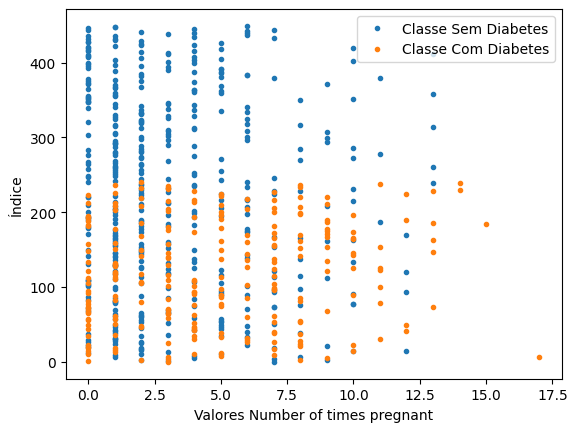

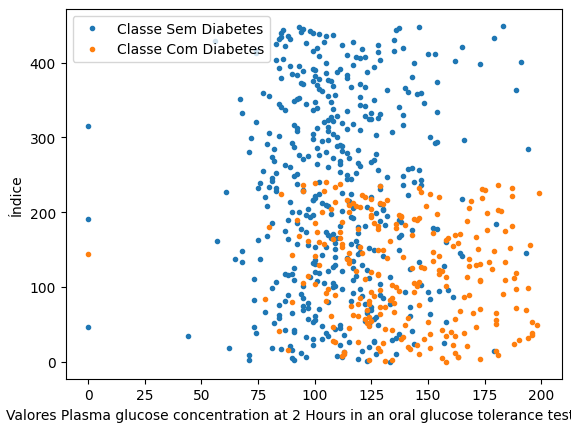

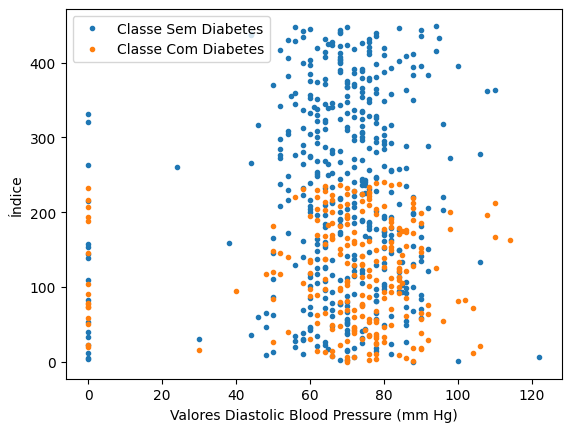

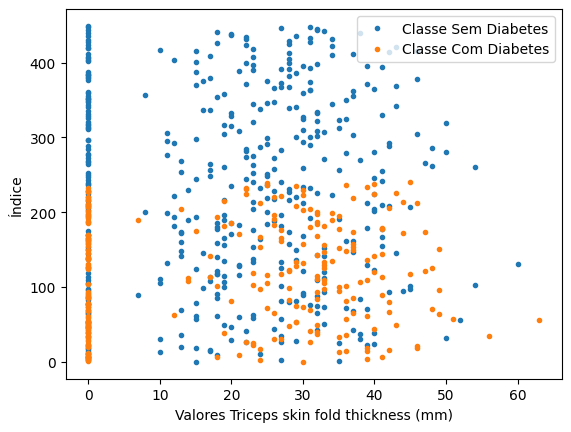

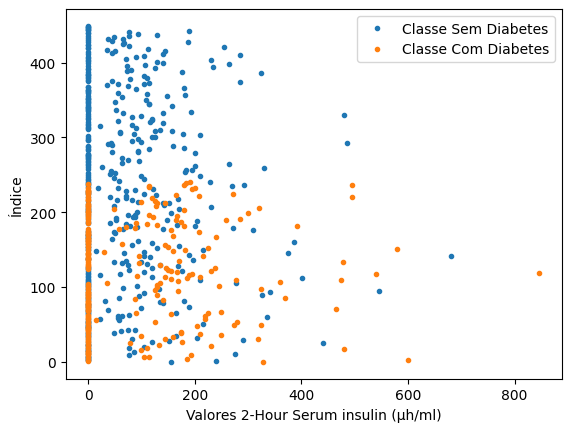

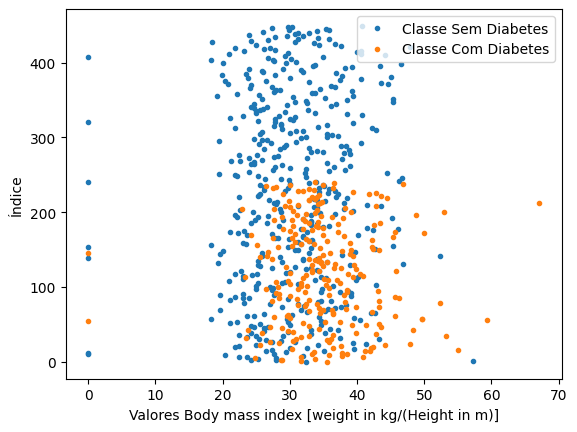

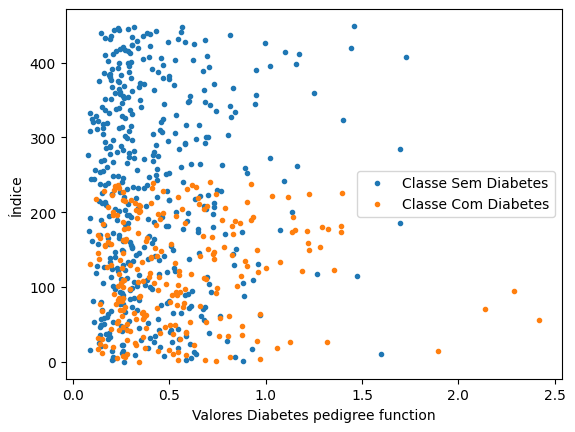

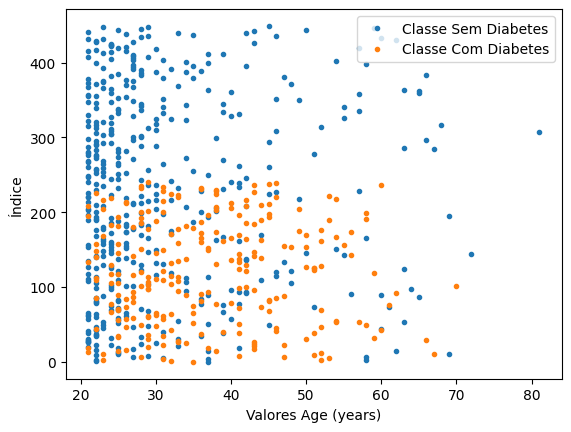

In [11]:
# Vizualização dos dados
for i in range(0, 8):
    y_values = np.arange(len(XSD_train[:, i]))
    plt.plot(XSD_train[:, i], y_values, '.', label='Classe Sem Diabetes')

    y_values2 = np.arange(len(XCD_train[:, i]))
    plt.plot(XCD_train[:, i], y_values2, '.', label='Classe Com Diabetes')

    plt.xlabel("Valores " + feature_names[i])
    plt.ylabel("Índice")
    plt.legend()
    plt.show()

<a id='subsection22'></a>
## <center><b>Classificadores binários</b></center>
<div style="text-align: justify">


Os três classificadores escolhidos para este trabalho foram a *Logistic Regression*, *Random Forest Classifier* e *KNeighbours Classifier.*

Tendo em conta os pontos de desenvolvimento foi realizado o ponto 1 e o ponto 2 ao mesmo tempo, realizando a classificação para valores normalizados e valores não normalizados de seguida e comparando os dois.

Para obter os melhores parâmetros em cada um dos modelos irá ser utilizado a função *GridSearchCV*. Esta função tenta todas as combinações possiveis dos parametros introduzidos de modo a encontrar a melhor combinação possível.

---
<a id='subsection23'></a>
## <center><b>Logistic Regression</b></center>
<div style="text-align: justify">


*Regressão logística* é uma técnica estatística que tem como objetivo principal prever a probabilidade da ocurrência de um evento binário, tendo em conta um conjunto de dados independentes.

Esta função recebe como alguns dos parâmetros os seguintes:

##### Penalty: {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
| Type | Rule  |    
| :-: | :-: |
| None | no penalty is added |
|'l2', default  | add a L2 penalty term and it is the default choice |
| 'l1' | add a L1 penalty term |
| 'elasticnet' | both L1 and L2 penalty terms are added |

##### tol: float, default=1e-4
Tolerance for stopping criteria.

##### C: float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

##### solver: {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ and ‘newton-cholesky’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrapt it with the OneVsRestClassifier.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

##### max_iter: int, default=100
Maximum number of iterations taken for the solvers to converge.





<a id='subsection231'></a>
## <center><b>Obtenção dos melhores parâmetros - Logistic Regression</b></center>
<div style="text-align: justify">



In [12]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_train_scaled = scaler.transform(X_val_train)
X_val_test_scaled = scaler.transform(X_val_test)
X_test_scaled = scaler.transform(X_test)

# Hiperparâmetros para busca em grade
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,100,1000],
    'max_iter': [1000],
    'tol': [1e-1,1e-2,1e-3,1e-4, 1e-5, 1e-6],
    'solver': ['lbfgs', 'saga']
}

# Busca em grade com validação cruzada
grid_searchScaled = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)
grid_searchScaled.fit(X_val_train_scaled, y_val_train)

# Melhor modelo
best_logreg_scaled = grid_searchScaled.best_estimator_

# Avaliação
print('Dados Normalizados')
print('Melhores Parâmetros:', grid_searchScaled.best_params_)


# Hiperparâmetros para busca em grade
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000],
    'tol': [1e-4, 1e-5, 1e-6],
    'solver': ['lbfgs', 'saga']
}

# Busca em grade com validação cruzada
grid_search = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)
grid_search.fit(X_val_train, y_val_train)

# Melhor modelo
best_logreg = grid_search.best_estimator_

# Avaliação
print()
print('Dados Não Normalizados')
print('Melhores Parâmetros:', grid_search.best_params_)

Dados Normalizados
Melhores Parâmetros: {'C': 1, 'max_iter': 1000, 'solver': 'saga', 'tol': 0.1}


C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Conve


Dados Não Normalizados
Melhores Parâmetros: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.0001}


C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Para encontrar os melhores hiperparâmetros para a Regressão Logística, utilizámos o método de busca em grade (Grid Search) com validação cruzada, tanto para dados normalizados como não normalizados. A normalização foi realizada com o StandardScaler, garantindo que as variáveis tivessem média zero e desvio padrão unitário. Foram avaliados diferentes valores para o parâmetro de regularização C, tolerância tol, e os algoritmos de otimização lbfgs e saga. Através deste processo, identificámos os melhores parâmetros para cada cenário, permitindo-nos analisar o impacto da normalização no desempenho do modelo e selecionar a configuração mais adequada para o próximo passo no teste.

<a id='subsection232'></a>
## <center><b>Teste de Validação - Logistic Regression</b></center>
<div style="text-align: justify">


Dados Normalizados - Validação
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        91
           1       0.69      0.56      0.62        48

    accuracy                           0.76       139
   macro avg       0.74      0.72      0.72       139
weighted avg       0.76      0.76      0.76       139

Prob Acertos Validação: 76.3


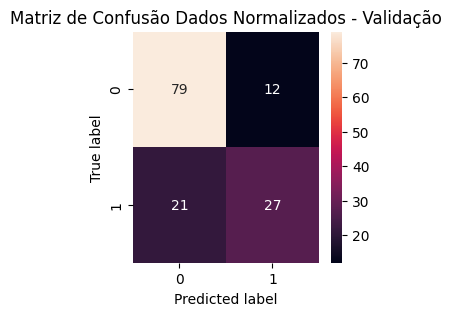

Dados não Normalizados - Validação
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        91
           1       0.66      0.56      0.61        48

    accuracy                           0.75       139
   macro avg       0.72      0.70      0.71       139
weighted avg       0.74      0.75      0.74       139

Prob Acertos Validação: 74.8


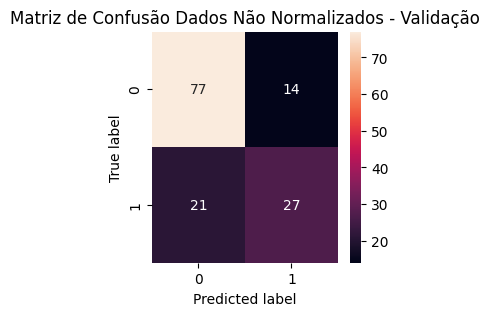

In [13]:
print('Dados Normalizados - Validação')
# Relatório de Classificação Validação
y_pred = best_logreg_scaled.predict(X_val_test_scaled)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_logreg_scaled.score(X_val_test_scaled, y_val_test) * 100))
# print(confusion_matrix(y_val_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Dados não Normalizados - Validação')


# Relatório de Classificação Validação
y_pred = best_logreg.predict(X_val_test)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_logreg.score(X_val_test, y_val_test) * 100))
# print(confusion_matrix(y_val_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()






Apresentam-se os resultados da validação do modelo de Regressão Logística, utilizando dados normalizados e não normalizados. Como é possível observar, não há diferenças significativas nos resultados entre as duas abordagens. Contudo, nota-se uma ligeira melhoria nos resultados ao usar os dados normalizados, o que sugere que a normalização dos dados pode ser vantajosa neste caso.

Relativamente às métricas avaliadas, a accuracy (taxa de acertos) atinge 76.3% com os dados normalizados, enquanto com os dados não normalizados é ligeiramente inferior, situando-se em 74.8%. O f-score, que combina precisão e recall, também segue esta tendência, indicando um desempenho global um pouco superior para os dados normalizados. No entanto, o desempenho no reconhecimento de diabetes (classe 1) ainda apresenta espaço para melhorias, uma vez que o recall nesta classe se mantém abaixo de 60% em ambos os casos.

Tendo em conta estes resultados, decidimos utilizar esta máquina para a próxima etapa de teste.

<a id='subsection233'></a>
## <center><b>Teste - Logistic Regression</b></center>
<div style="text-align: justify">


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.84      0.78      0.81        27

    accuracy                           0.87        77
   macro avg       0.86      0.85      0.85        77
weighted avg       0.87      0.87      0.87        77

Prob Acertos Teste: 87.0


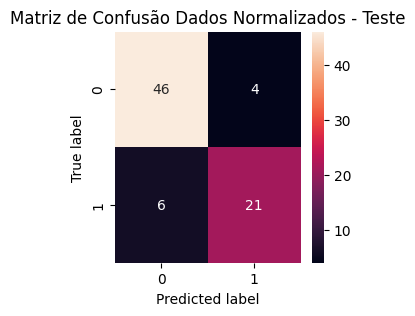

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        50
           1       0.80      0.74      0.77        27

    accuracy                           0.84        77
   macro avg       0.83      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77

Prob Acertos Teste: 84.4


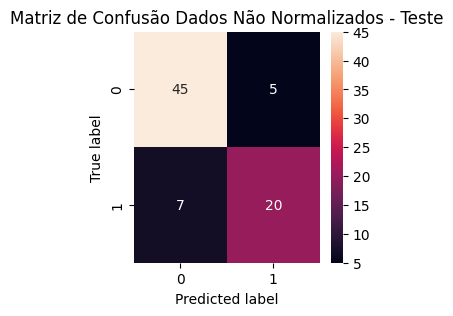

In [14]:
# Treino para Teste
best_logreg_scaled.fit(X_train_scaled, y_train)

y_pred = best_logreg_scaled.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_logreg_scaled.score(X_test_scaled, y_test) * 100))
# print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(3,3))
CM_logreg_scaled = confusion_matrix(y_test, y_pred)
sns.heatmap(CM_logreg_scaled,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Treino para Teste
best_logreg.fit(X_train, y_train)

y_pred = best_logreg.predict(X_test)
CM_logreg = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_logreg.score(X_test, y_test) * 100))
# print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(CM_logreg,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Os resultados mostram que o modelo com dados normalizados apresenta uma leve melhoria na taxa de acertos geral (accuracy) e maior equilíbrio entre precisão e recall para ambas as classes, especialmente para a classe dos diabetes (classe 1). Isto é muito importante pois, num caso como este tema do trabalho, acerca da saúde, queremos apontar para uma máquina com grande precisão na deteção de patologias e reduzir o máximo possível a taxa de False Negatives (considerando diabetes como positivo).
E por isto, estes resultados reforçam a decisão de usar dados normalizados na validação final e destacam a importância de considerar a normalização para melhorar o desempenho do modelo em cenários como este.

<a id='subsection234'></a>
## <center><b> Curva ROC - Logistic Regression</b></center>
<div style="text-align: justify">




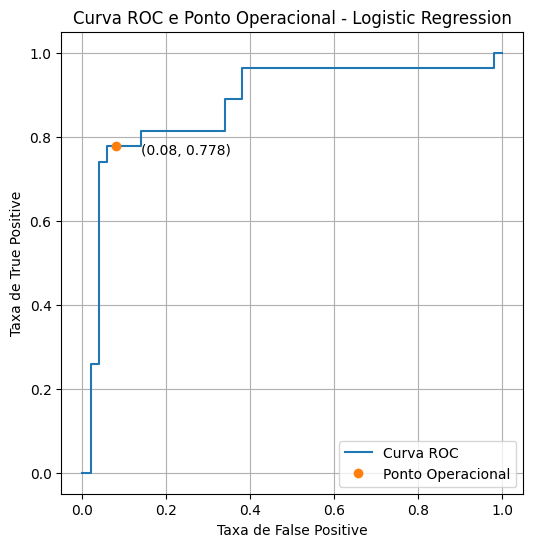

In [15]:
fpr, tpr, t = roc_curve(y_test, best_logreg_scaled.decision_function(X_test_scaled))

p1 = CM_logreg_scaled[0,1]/(CM_logreg_scaled[0,1] + CM_logreg_scaled[0,0])
p2 = CM_logreg_scaled[1,1]/(CM_logreg_scaled[1,1] + CM_logreg_scaled[1,0])

# Mostrar resultados...
plt.figure(figsize=(6,6))

# Plot da Curva ROC
plt.plot(fpr,tpr, label='Curva ROC')

# Plot dos Pontos
plt.plot(p1, p2, 'o', label='Ponto Operacional')

plt.title('Curva ROC e Ponto Operacional - Logistic Regression')
plt.ylabel('Taxa de True Positive')
plt.xlabel('Taxa de False Positive')
plt.legend()
plt.text(p1+0.06, p2-0.02, '(' + str(np.round(p1,3)) + ', ' + str(np.round(p2,3)) + ')' )
plt.grid(True)
plt.axis('scaled')
plt.show()


A curva ROC apresentada avalia o desempenho do modelo de Regressão Logística utilizando dados normalizados, mostrando a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares de decisão. O ponto operacional destacado, com coordenadas (0.1, 0.778), indica que, com uma taxa de falsos positivos de 10%, o modelo alcança uma taxa de verdadeiros positivos de 77.8%. A forma da curva, que se aproxima do canto superior esquerdo, sugere um bom desempenho do modelo, refletindo a sua capacidade de separar corretamente as classes positiva e negativa.

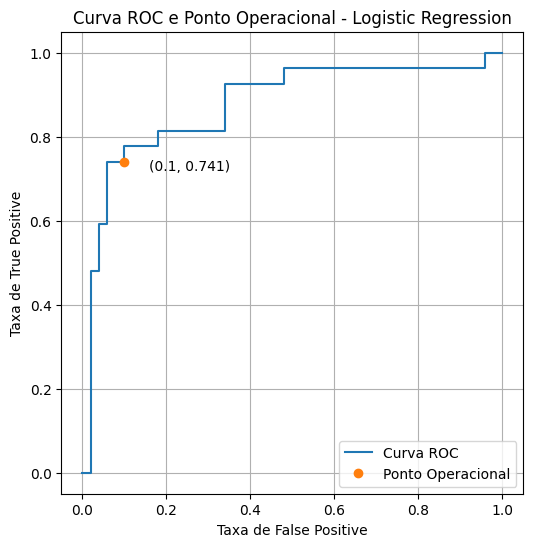

In [16]:
fpr, tpr, t = roc_curve(y_test, best_logreg.decision_function(X_test))

p1 = CM_logreg[0,1]/(CM_logreg[0,1] + CM_logreg[0,0])
p2 = CM_logreg[1,1]/(CM_logreg[1,1] + CM_logreg[1,0])

# Mostrar resultados...
plt.figure(figsize=(6,6))

# Plot da Curva ROC
plt.plot(fpr,tpr, label='Curva ROC')

# Plot dos Pontos
plt.plot(p1, p2, 'o', label='Ponto Operacional')

plt.title('Curva ROC e Ponto Operacional - Logistic Regression')
plt.ylabel('Taxa de True Positive')
plt.xlabel('Taxa de False Positive')
plt.legend()
plt.text(p1+0.06, p2-0.02, '(' + str(np.round(p1,3)) + ', ' + str(np.round(p2,3)) + ')' )
plt.grid(True)
plt.axis('scaled')
plt.show()

A curva ROC para os dados não normalizados avalia o desempenho do modelo de Regressão Logística, ilustrando a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares de decisão. O ponto operacional destacado, com coordenadas (0.1, 0.741), revela que, com uma taxa de falsos positivos de 10%, o modelo alcança uma taxa de verdadeiros positivos de 74.1%. Embora o desempenho continue razoável, a taxa de verdadeiros positivos é ligeiramente inferior em comparação com o modelo baseado em dados normalizados, indicando que a normalização contribuiu para um desempenho mais equilibrado na separação das classes.

---
<a id='subsection24'></a>
## <center><b>  RandomForestClassifier</b></center>
<div style="text-align: justify">

*Random Forest Classifier* é um algoritmo de aprendizagem automática supervizionado que consegue utilizar tarefas de regressão e classificação.

Esta função tem como alguns dos parâmetros os seguintes:

#### n_estimators: int, default=100
The number of trees in the forest.
#### max_depth: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#### min_samples_split: int or float, default=2
The minimum number of samples required to split an internal node:

- If int, then consider min_samples_split as the minimum number.

- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

#### min_samples_leaf: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- If int, then consider min_samples_leaf as the minimum number.

- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node

#### max_features: {“sqrt”, “log2”, None}, int or float, default=”sqrt”
The number of features to consider when looking for the best split:

- If int, then consider max_features features at each split.

- If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.

- If “sqrt”, then max_features=sqrt(n_features).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

<a id='subsection241'></a>
## <center><b>  Obtenção dos melhores parâmetros - Random Forest Classifier</b></center>
<div style="text-align: justify">

In [17]:
#Dados Normalizados

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_train_scaled = scaler.transform(X_val_train)
X_val_test_scaled = scaler.transform(X_val_test)
X_test_scaled = scaler.transform(X_test)

forest_grid = {
    'n_estimators': [100,200],         # Number of trees
    'max_depth': [20,30],         # Maximum depth of each tree
    'max_features': ['log2','sqrt'],        # Number of features to consider at each split
    'min_samples_split': [2],         # Minimum samples needed to split a node
    'min_samples_leaf': [1]   # Minimum samples needed to be at a leaf node
}

forest = RandomForestClassifier(random_state=1)

gridForest = GridSearchCV(forest,param_grid=forest_grid,cv=5)
gridForest.fit(X_val_train_scaled,y_val_train)

best_Forest_scaled = gridForest.best_estimator_

print('Dados Normalizados')
print('Melhores Parâmetros:', gridForest.best_params_)






#Dados Não Normalizados
forest_grid = {
    'n_estimators': [100,200],         # Number of trees
    'max_depth': [20,30],         # Maximum depth of each tree
    'max_features': ['log2','sqrt'],        # Number of features to consider at each split
    'min_samples_split': [2],         # Minimum samples needed to split a node
    'min_samples_leaf': [1]   # Minimum samples needed to be at a leaf node
}

forest = RandomForestClassifier(random_state=1)

gridForest = GridSearchCV(forest,param_grid=forest_grid,cv=5)
gridForest.fit(X_val_train,y_val_train)

best_Forest = gridForest.best_estimator_

print()
print('Dados Não Normalizados')
print('Melhores Parâmetros:', gridForest.best_params_)


Dados Normalizados
Melhores Parâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Dados Não Normalizados
Melhores Parâmetros: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Foi realizada uma busca pelos melhores hiperparâmetros para o classificador Random Forest utilizando Grid Search com validação cruzada, tanto para dados normalizados quanto não normalizados. Os parâmetros ajustados incluem o número de árvores na floresta (n_estimators), a profundidade máxima das árvores (max_depth), o número de recursos considerados em cada divisão (max_features), além dos critérios mínimos para divisões e folhas. Para os dados normalizados, foi aplicado o StandardScaler tal como foi utilizado anteriormente, garantindo uma escala uniforme entre as variáveis. Este processo assegura que o modelo esteja otimizado para cada conjunto de dados, permitindo uma comparação direta entre os resultados normalizados e não normalizados.

<a id='subsection242'></a>
## <center><b>Teste de Validação - Random Forest Classifier</b></center>
<div style="text-align: justify">

Dados Normalizados
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.66      0.65      0.65        48

    accuracy                           0.76       139
   macro avg       0.74      0.74      0.74       139
weighted avg       0.76      0.76      0.76       139

Prob Acertos Validação: 76.3


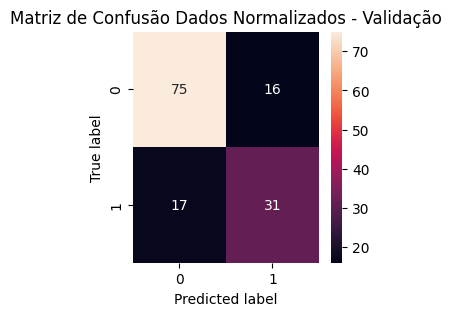

Dados não Normalizados
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.66      0.65      0.65        48

    accuracy                           0.76       139
   macro avg       0.74      0.74      0.74       139
weighted avg       0.76      0.76      0.76       139

Prob Acertos Validação: 76.3


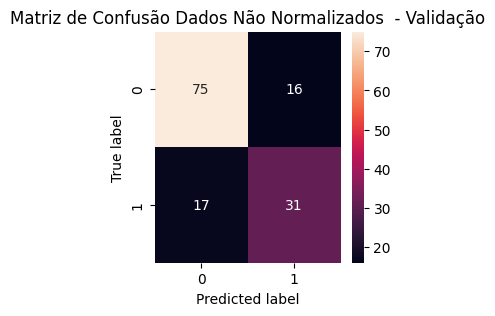

In [18]:

# forest_grid = {
#     'n_estimators': [100, 200, 300, 500],              # Número de árvores
#     'max_depth': [10, 20, 30, None],                   # Profundidade máxima
#     'max_features': ['log2', 'sqrt', 0.5, None],       # Fração de features ou todas
#     'min_samples_split': [2, 5, 10, 15],               # Amostras mínimas para divisão
#     'min_samples_leaf': [1, 2, 4, 8],                  # Amostras mínimas nas folhas
#     'bootstrap': [True, False],                        # Amostragem com/sem reposição
#     'criterion': ['gini', 'entropy'],                  # Critério de qualidade do split
#     'class_weight': [None, 'balanced', 'balanced_subsample']  # Pesos das classes
# }




best_Forest_scaled = RandomForestClassifier(random_state=1,max_depth=None,max_features='log2',min_samples_leaf=6,min_samples_split=4,n_estimators=200,class_weight='balanced',criterion='entropy').fit(X_val_train_scaled,y_val_train)

print('Dados Normalizados')

# Relatório de Classificação Validação
y_pred = best_Forest_scaled.predict(X_val_test_scaled)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_Forest_scaled.score(X_val_test_scaled, y_val_test) * 100))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



print('Dados não Normalizados')

best_Forest = RandomForestClassifier(random_state=1,max_depth=None,max_features='log2',min_samples_leaf=6,min_samples_split=4,n_estimators=200,class_weight='balanced',criterion='entropy').fit(X_val_train,y_val_train)

# Relatório de Classificação Validação
y_pred = best_Forest.predict(X_val_test)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_Forest.score(X_val_test, y_val_test) * 100))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados  - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()




Apresentam-se os resultados da validação do modelo Random Forest Classifier, utilizando dados normalizados e não normalizados. Como é possível observar, não há qualquer diferença nos resultados entre as duas abordagens, o que dá a entender que para este classificador não há qualquer necessidade em normalizar os dados.

Relativamente às métricas avaliadas, a accuracy (taxa de acertos) atinge 76.3%. No que toca ao desempenho no reconhecimento de diabetes (classe 1), ainda apresenta espaço para melhorias, uma vez que o recall nesta classe atinge 65%.

Tendo em conta estes resultados, decidimos utilizar esta máquina para a próxima etapa de teste.

<a id='subsection243'></a>
## <center><b>Teste - Random Forest Classifier</b></center>
<div style="text-align: justify">

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.71      0.89      0.79        27

    accuracy                           0.83        77
   macro avg       0.82      0.84      0.82        77
weighted avg       0.85      0.83      0.83        77

Prob Acertos Teste: 83.1


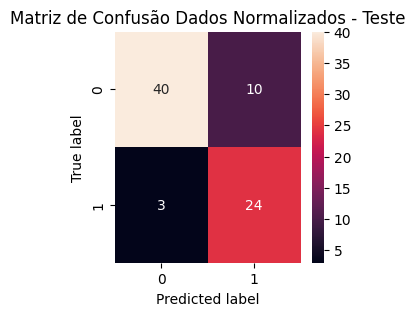

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.71      0.89      0.79        27

    accuracy                           0.83        77
   macro avg       0.82      0.84      0.82        77
weighted avg       0.85      0.83      0.83        77

Prob Acertos Teste: 83.1


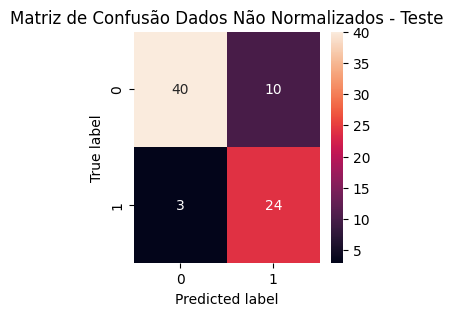

In [19]:
# Treino para Teste
best_Forest_scaled.fit(X_train_scaled, y_train)

y_pred = best_Forest_scaled.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_Forest_scaled.score(X_test_scaled, y_test) * 100))
plt.figure(figsize=(3,3))
CM_Forest_scaled = confusion_matrix(y_test, y_pred)
sns.heatmap(CM_Forest_scaled,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



# Treino para Teste
best_Forest.fit(X_train, y_train)

y_pred = best_Forest.predict(X_test)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_Forest.score(X_test, y_test) * 100))
plt.figure(figsize=(3,3))
CM_Forest = confusion_matrix(y_test, y_pred)
sns.heatmap(CM_Forest,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Os resultados mostram que o modelo com dados normalizados não apresentam qualquer diferença do modelo sem dados normalizados. Conseguimos concluir que para o classificar Random Forerst não há qualquer necessidade de normalizar os valores. Este classificador teve um grande desempenho com 83.1% de acertos, obtendo apenas 3 False Negatives, o que dado o tema do trabalho, é um ótimo resultado pois, procuramos minimizar o erro na deteção de patologias. Com estes resultados podemos concluir que esta máquina aprendeu muito bem o problema.

<a id='subsection244'></a>
## <center><b>Curva ROC - Random Forest Classifier</b></center>
<div style="text-align: justify">


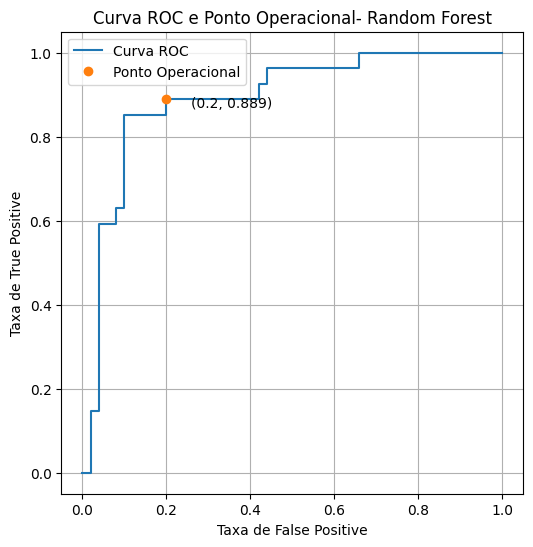

In [20]:
# Probabilidades preditas pelo KNN
y_probs = best_Forest_scaled.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva

# Curva ROC
fpr, tpr, t = roc_curve(y_test, y_probs)

p1 = CM_Forest_scaled[0,1]/(CM_Forest_scaled[0,1] + CM_Forest_scaled[0,0])
p2 = CM_Forest_scaled[1,1]/(CM_Forest_scaled[1,1] + CM_Forest_scaled[1,0])

# Mostrar resultados...
plt.figure(figsize=(6,6))

# Plot da Curva ROC
plt.plot(fpr,tpr, label='Curva ROC')

# Plot dos Pontos
plt.plot(p1, p2, 'o', label='Ponto Operacional')

plt.title('Curva ROC e Ponto Operacional- Random Forest')
plt.ylabel('Taxa de True Positive')
plt.xlabel('Taxa de False Positive')
plt.legend()
plt.text(p1+0.06, p2-0.02, '(' + str(np.round(p1,3)) + ', ' + str(np.round(p2,3)) + ')' )
plt.grid(True)
plt.axis('scaled')
plt.show()

A curva ROC apresentada avalia o desempenho do modelo de Random Forest utilizando os dados normalizados, mostrando a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares de decisão. O ponto operacional destacado, com as coordenadas (0.2,0.889), indica que, com uma taxa de falsos positivos de 20%, o modelo alcança uma taxa de verdadeiros positivos de 88.9%. A forma da curva, que se aproxima do canto superior esquerdo, sugere um bom desempenho do modelo,refletindo a sua capacidade de separar corretamente as classes positiva e negativa.

A comparar com as curvas ROC dos outros modelos aqui utilizados este é o que apresenta os melhores resultados.

Para este modelo a curva ROC irá tambêm ser identica com os valores normalizados e não normalizados o que implica não existir diferenças no modelo utilizando os diferentes valores.


---

<a id='subsection25'></a>
## <center><b>KNeighbors</b></center>
<div style="text-align: justify">

K-nearest neighbors algorithm é um algoritmo supervisionado utilizado para classificação e regressão que utiliza aproximação para realizar classificaão sobre um grupo individual de um tipo de dados.

Esta função tem como algumas das características as seguintes:

#### n_neighbors: int, default=5
Number of neighbors to use by default for kneighbors queries.

#### weights: {‘uniform’, ‘distance’}, callable or None, default=’uniform’
Weight function used in prediction. Possible values:

- ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

- ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

- ‘ball_tree’ will use BallTree

- ‘kd_tree’ will use KDTree

- ‘brute’ will use a brute-force search.

- ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

#### leaf_size: int, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

#### p: float, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.

#### metric: str or callable, default=’minkowski’
Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.

If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

If metric is a callable function, it takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors. This works for Scipy’s metrics, but is less efficient than passing the metric name as a string.



<a id='subsection251'></a>
## <center><b>Obtenção dos melhores parâmetros - KNeigh</b></center>
<div style="text-align: justify">


In [21]:
KNeighGrid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],          # Different numbers of neighbors
    'weights': ['uniform','distance'],       # Uniform vs. distance-based weighting teste fica igual de qualquer das maneiras
    'metric': [ 'manhattan','minkowski'],     # Testing different distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithms for neighbor search indiferente
    'leaf_size': [1,10,20,30],            # Leaf size for tree-based algorithms indiferente
    'p':[1,2]
}
knn= KNeighborsClassifier()

grid_KNeigh = GridSearchCV(estimator=knn, param_grid=KNeighGrid,cv=5)
grid_KNeigh.fit(X_val_train_scaled,y_val_train)
best_KNeigh_scaled = grid_KNeigh.best_estimator_

print('Dados Normalizados')
print('Melhores Parâmetros:', grid_KNeigh.best_params_)


KNeighGrid = {
    'n_neighbors': [21,18,19,20,22,23],          # Different numbers of neighbors
    'weights': ['uniform','distance'],       # Uniform vs. distance-based weighting teste fica igual de qualquer das maneiras
    'metric': [ 'manhattan','minkowski'],     # Testing different distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithms for neighbor search indiferente
    'leaf_size': [1,10,20,30],            # Leaf size for tree-based algorithms indiferente
    'p':[1,2]
}
knn= KNeighborsClassifier()

grid_KNeigh = GridSearchCV(estimator=knn, param_grid=KNeighGrid,cv=5)
grid_KNeigh.fit(X_val_train,y_val_train)
best_KNeigh = grid_KNeigh.best_estimator_

print('Dados Não Normalizados')
print('Melhores Parâmetros:', grid_KNeigh.best_params_)

C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Dados Normalizados
Melhores Parâmetros: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Dados Não Normalizados
Melhores Parâmetros: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 23, 'p': 1, 'weights': 'uniform'}


Foi realizado um ajuste de hiperparâmetros para o modelo K-Nearest Neighbors (KNN) utilizando Grid Search com validação cruzada, tanto para dados normalizados quanto para dados não normalizados. Entre os parâmetros ajustados estão o número de vizinhos (n_neighbors), o tipo de ponderação (weights: uniforme ou baseado na distância), a métrica de distância utilizada (metric: Manhattan ou Minkowski) e o algoritmo de busca de vizinhos (algorithm: auto, ball_tree, kd_tree ou brute). Para ambos os cenários, observou-se que certos parâmetros, como o algoritmo de busca e o tamanho das folhas (leaf_size), não influenciam significativamente no desempenho do modelo. Este processo permite identificar a configuração ideal para maximizar o desempenho do KNN em cada conjunto de dados e verificar o impacto da normalização nos resultados.


<a id='subsection252'></a>
## <center><b>Treino de Validação - KNeighbors</b></center>
<div style="text-align: justify">


Dados Normalizados
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        91
           1       0.61      0.56      0.59        48

    accuracy                           0.73       139
   macro avg       0.70      0.69      0.69       139
weighted avg       0.72      0.73      0.72       139

Prob Acertos Validação: 72.7


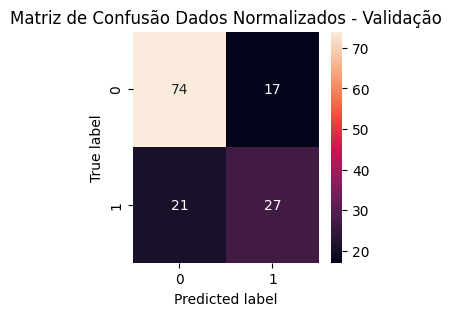

Dados não Normalizados
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        91
           1       0.68      0.52      0.59        48

    accuracy                           0.75       139
   macro avg       0.73      0.69      0.70       139
weighted avg       0.74      0.75      0.74       139

Prob Acertos Validação: 74.8


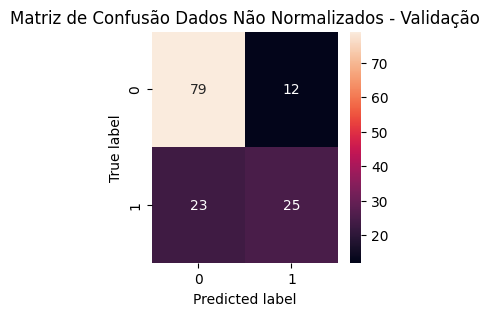

In [22]:
print('Dados Normalizados')

# Relatório de Classificação Validação
y_pred = best_KNeigh_scaled.predict(X_val_test_scaled)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_KNeigh_scaled.score(X_val_test_scaled, y_val_test) * 100))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



print('Dados não Normalizados')

# best_KNeigh = KNeighborsClassifier().fit(X_val_train,y_val_train)

# Relatório de Classificação Validação
y_pred = best_KNeigh.predict(X_val_test)
print(classification_report(y_val_test, y_pred))
print('Prob Acertos Validação: %.1f' % (best_KNeigh.score(X_val_test, y_val_test) * 100))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_val_test, y_pred),annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados - Validação')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Apresentam-se os resultados da validação do modelo KNeighbors, utilizando dados normalizados e não normalizados. É possivel observar que se obtêm melhores resultados utilizando dados não normalizados, significando que não é vantajoso a normalização dos dados antes da utilização do modelo.

Relativamente às métricas avaliadas, a accuracy atinge 72.7% com os dados normalizados, verificando-se um aumento para 74.8% utilizando os dados não normalizados. O f-score segue a mesma têndencia, indicando um melhor desempenho com os dados não normalizados. No entanto, o desempenho no reconhecimento de diabetes é pior nos dados não normalizados com 23 false positive para 25 true positive comparando com dados normalizados onde se obtêm 21 false positive para 27 true positives. Pode-se verificar com o recall onde utilizando os dados normalizados se obtêm 56% enquanto que com dados não normalizados se obtêm 52%.


<a id='subsection253'></a>
## <center><b>Teste - KNeighbors</b></center>
<div style="text-align: justify">


              precision    recall  f1-score   support

           0       0.75      0.80      0.78        50
           1       0.58      0.52      0.55        27

    accuracy                           0.70        77
   macro avg       0.67      0.66      0.66        77
weighted avg       0.69      0.70      0.70        77

Prob Acertos Teste: 70.1


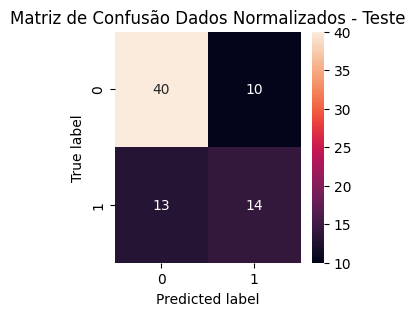

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        50
           1       0.70      0.70      0.70        27

    accuracy                           0.79        77
   macro avg       0.77      0.77      0.77        77
weighted avg       0.79      0.79      0.79        77

Prob Acertos Teste: 79.2


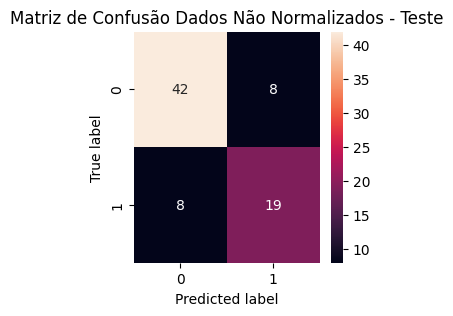

In [23]:
# Treino para Teste
best_KNeigh_scaled.fit(X_train_scaled, y_train)

y_pred = best_KNeigh_scaled.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_KNeigh_scaled.score(X_test_scaled, y_test) * 100))
plt.figure(figsize=(3,3))
CM_KNeigh_scaled = confusion_matrix(y_test, y_pred)
sns.heatmap(CM_KNeigh_scaled,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



# Treino para Teste
best_KNeigh.fit(X_train, y_train)

y_pred = best_KNeigh.predict(X_test)
print(classification_report(y_test, y_pred))
print('Prob Acertos Teste: %.1f' % (best_KNeigh.score(X_test, y_test) * 100))
plt.figure(figsize=(3,3))
CM_KNeigh = confusion_matrix(y_test, y_pred)
sns.heatmap(CM_KNeigh,annot=True,fmt='g')
plt.title('Matriz de Confusão Dados Não Normalizados - Teste')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Os resultados mostram que o modelo com dados normalizados não tem tanta precisão como o modelo sem dados normalizados, assim para este classificador concluimos que não há necessidade de normalizar os dados pois, o resultado não será tão bom. Este classificador teve um bom desempenho com dados não normalizados, embora foi o pior dos 3 modelos, com 79.2% de acertos. Obteve um maior número de False Negatives, o que é crítico pois queremos reduzir ao máximo este número. Já o modelo com dados normalizados obteve um desempenho mau com apenas 70% de acertos e uma quantidade já elevada de False Negatives (50% dos dados da classe 1 foram classificados com classe 0). Com estes resultados podemos concluir que esta máquina não aprendeu tão bem o problema como os outros classificadores, mas sem dados normalizados ainda conseguiu aprender o problema.


<a id='subsection254'></a>
## <center><b>Curva ROC - KNeighbors</b></center>
<div style="text-align: justify">



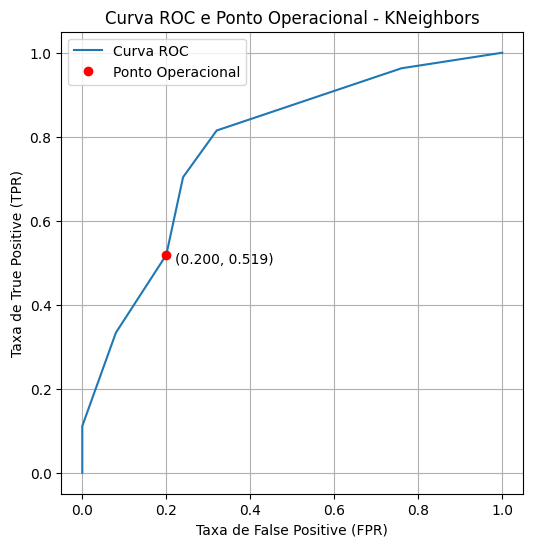

In [24]:
# Probabilidades preditas pelo KNN
y_probs = best_KNeigh_scaled.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva

# Curva ROC
fpr, tpr, t = roc_curve(y_test, y_probs)

# Taxas específicas do ponto operacional
p1 = CM_KNeigh_scaled[0, 1] / (CM_KNeigh_scaled[0, 1] + CM_KNeigh_scaled[0, 0])  # False Positive Rate (FPR)
p2 = CM_KNeigh_scaled[1, 1] / (CM_KNeigh_scaled[1, 1] + CM_KNeigh_scaled[1, 0])  # True Positive Rate (TPR)

# Plotando a curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Curva ROC')

# Marcando o ponto operacional
plt.plot(p1, p2, 'o', label='Ponto Operacional', color='red')

plt.title('Curva ROC e Ponto Operacional - KNeighbors')
plt.ylabel('Taxa de True Positive (TPR)')
plt.xlabel('Taxa de False Positive (FPR)')
plt.legend()
plt.text(p1 + 0.02, p2 - 0.02, f'({p1:.3f}, {p2:.3f})', fontsize=10)
plt.grid(True)
plt.axis('scaled')
plt.show()

Esta curva ROC apresenta o desempenho do modelo de KNeighbors utilizando dados normalizados, mostrando a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares de decisão. O ponto operacional destacado, com coordenadas (0.2,0.519), indica que, com uma taxa de falsos positivos de 20%, o modelo alcança uma taxa de verdadeiros positivos de 51.9%.

Este modelo não têm um bom desempenho comparando com os valores não normalizados ou com os outros modelos utilizados neste trabalho.

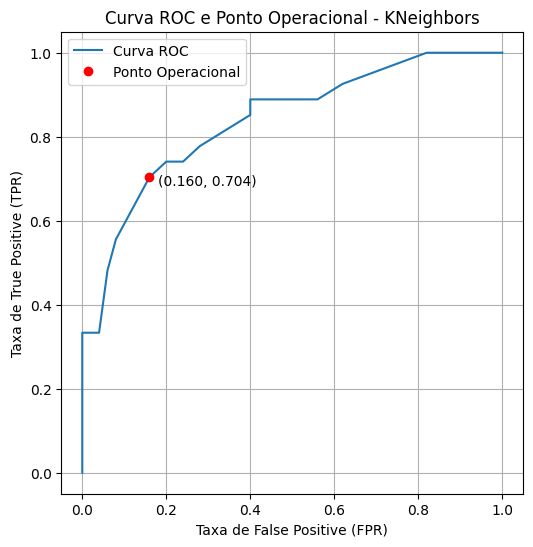

In [25]:
# Probabilidades preditas pelo KNN
y_probs = best_KNeigh.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Curva ROC
fpr, tpr, t = roc_curve(y_test, y_probs)

# Taxas específicas do ponto operacional
p1 = CM_KNeigh[0, 1] / (CM_KNeigh[0, 1] + CM_KNeigh[0, 0])  # False Positive Rate (FPR)
p2 = CM_KNeigh[1, 1] / (CM_KNeigh[1, 1] + CM_KNeigh[1, 0])  # True Positive Rate (TPR)

# Plotando a curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Curva ROC')

# Marcando o ponto operacional
plt.plot(p1, p2, 'o', label='Ponto Operacional', color='red')

plt.title('Curva ROC e Ponto Operacional - KNeighbors')
plt.ylabel('Taxa de True Positive (TPR)')
plt.xlabel('Taxa de False Positive (FPR)')
plt.legend()
plt.text(p1 + 0.02, p2 - 0.02, f'({p1:.3f}, {p2:.3f})', fontsize=10)
plt.grid(True)
plt.axis('scaled')
plt.show()

Esta curva ROC apresenta o desempenho do modelo de KNeighbors utilizando dados normalizados, mostrando a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para diferentes limiares de decisão. O ponto operacional destacado, com coordenadas (0.160,0.704), indica que, com uma taxa de falsos positivos de 16%, o modelo alcança uma taxa de verdadeiros positivos de 70.4%.

Este modelo, utilizando valores não normalizados obtem uma melhor capacidade de predição comparando com o mesmo modelo utilizando valores normalizados, mesmo que continue a ter uma pior perfomance comparando com os outros modelos.

---

<a id='section3'></a>
## <center><b>Resultados</b></center>
<div style="text-align: justify">


Comparando os três modelos utilizados neste trabalho, o que obteve os melhores resultados foi o _Logistic Regression Classifier_ com uma percentagem de acerto de 85.7% utilizando dados normalizados e 84.4% de acerto utilizando valores não normalizados, em segundo foi o _Random Forest Classifier_ com 83.1% de acerto e em último com 79.2% utilizando os valores não normalizados foi o _KNeighbors Classifier_.

Em relação ao True Positive Rate, o melhor classificador foi o _Random Forest Classifier_ com 88.9% no seu ponto operacional e atigindo os 100% primeiro que os outros dois classificadores.

### Melhores valores no ponto operacional ROC Curve:

|Modelo | TPR | FPR|
|:-:| :-:|:-:|
|Logistic Regression | 77.8% | 10% |
|Random Forest | 88.9% | 20% |
|KNeighbor | 70.4% | 16% |



---


<a id='section4'></a>
## <center><b>Conclusão</b></center>
<div style="text-align: justify">


Em conclusão, este primeiro trabalho prático permitiu-nos aplicar tanto os conceitos teóricos lecionados em aula como os laborátorios e fichas realizadas sobre modelos de classificação e regressão para aprendizagem automática.

Foi possivel aprofundar o conhecimento de várias bibliotecas python mas principalemente do sklearn que contém as funções necessárias para o bom funcionamento do nosso trabalho.

Sentimos que realizamos um bom trabalho que consegue responder à questão deste trabalho sobre a predição da existência ou não de diabetes em mulheres da tribo _Pima Indians_.

---
<a id='section5'></a>
## <center><b>Bibliografia</b></center>
<div style="text-align: justify">

[Slides e vídeos da unidade curricular disponibilizados pelos docentes;](https://2425moodle.isel.pt/course/view.php?id=8219)\
[Documentação Logistic Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)\
[Documentação Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)\
[Documentação KNeighbors](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
